In [1]:
import numpy as np
import pandas as pd
from copy import deepcopy
from cordova_plugins import d_plugins
import matplotlib.pyplot as plt
import seaborn as sns



# Import Dataset

In [2]:
df_api = pd.read_csv("../db/cdv/cordova_API.csv")
df_plugin_declaration = pd.read_csv("../db/cdv/cordova_PLUGIN_DECLARATION.csv")
# df_feature = pd.read_csv("../db/fcordova/eatures.csv")


In [3]:
df_api.columns

Index(['apk_name', 'battery-status', 'camera', 'contacts', 'device', 'dialogs',
       'file', 'geolocation', 'globalization', 'inappbrowser', 'media',
       'media-capture', 'network-information', 'splashscreen', 'statusbar',
       'vibration'],
      dtype='object')

In [4]:
l_api = list(df_api.columns)
l_api

['apk_name',
 'battery-status',
 'camera',
 'contacts',
 'device',
 'dialogs',
 'file',
 'geolocation',
 'globalization',
 'inappbrowser',
 'media',
 'media-capture',
 'network-information',
 'splashscreen',
 'statusbar',
 'vibration']

In [5]:
df_api

,apk_name,battery-status,camera,contacts,device,dialogs,file,geolocation,globalization,inappbrowser,media,media-capture,network-information,splashscreen,statusbar,vibration
0,com.pr.ojectblue.dothis,13,33,4,7,2,5,8,0,0,1,2,5,0,0,0
1,com.indiageeks.apk,13,9,1,1,13,1,1,1,0,94,1,5,1,0,0
2,com.koimoi.android,13,8,1,4,2,8,1,1,0,94,1,11,1,0,0
3,com.activitylabs.bankbluffer,13,6,0,8,1,7,4,0,0,98,0,1,0,0,0
4,prayerguide.thegagne.com,0,17,0,7,3,5,8,0,0,1,2,5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,sportstables.com,13,8,1,1,2,8,1,1,0,94,1,11,1,0,0
658,com.phonegap.tip,0,9,0,1,2,5,1,0,0,12,2,0,0,0,0
659,com.ugliapps.iheartfruits,12,3,0,3,0,6,0,0,0,74,0,1,0,0,0
660,sunnyappz.thesecretquotes,13,6,0,8,0,8,0,0,0,98,0,5,0,0,0


In [6]:
df_plugin_declaration

,apk_name,battery-status,camera,contacts,device,dialogs,file,geolocation,globalization,inappbrowser,media,media-capture,network-information,splashscreen,statusbar,vibration
0,com.pr.ojectblue.dothis,0,1,1,1,1,1,1,0,0,1,1,0,0,0,0
1,com.indiageeks.apk,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
2,com.koimoi.android,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0
3,com.activitylabs.bankbluffer,1,1,1,1,1,1,1,0,0,1,1,1,1,0,0
4,prayerguide.thegagne.com,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,sportstables.com,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
658,com.phonegap.tip,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
659,com.ugliapps.iheartfruits,1,1,1,1,1,1,1,0,0,1,1,0,0,0,0
660,sunnyappz.thesecretquotes,1,1,1,1,1,1,1,0,0,1,1,1,1,0,0


# Analyse API calls

## The occurances

### The occurances of funcitons detected for each plugin in each APK

In [7]:
df_plugins_only = df_api.drop(columns=["apk_name"])
df_plugins_only

,battery-status,camera,contacts,device,dialogs,file,geolocation,globalization,inappbrowser,media,media-capture,network-information,splashscreen,statusbar,vibration
0,13,33,4,7,2,5,8,0,0,1,2,5,0,0,0
1,13,9,1,1,13,1,1,1,0,94,1,5,1,0,0
2,13,8,1,4,2,8,1,1,0,94,1,11,1,0,0
3,13,6,0,8,1,7,4,0,0,98,0,1,0,0,0
4,0,17,0,7,3,5,8,0,0,1,2,5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,13,8,1,1,2,8,1,1,0,94,1,11,1,0,0
658,0,9,0,1,2,5,1,0,0,12,2,0,0,0,0
659,12,3,0,3,0,6,0,0,0,74,0,1,0,0,0
660,13,6,0,8,0,8,0,0,0,98,0,5,0,0,0


### The occurance of plugins for entire dataset

In [8]:
total_apk = df_plugins_only.shape[0]
print(f"Total APKs: {total_apk}")
df_cnt = df_plugins_only.astype(bool).sum(axis=0).sort_values(ascending=True)
df_cnt

Total APKs: 662


inappbrowser             0
vibration                0
statusbar               20
globalization          189
splashscreen           241
media-capture          286
contacts               301
geolocation            426
dialogs                442
battery-status         503
network-information    531
file                   535
camera                 555
media                  565
device                 571
dtype: int64

In [9]:
# percentage of apks using each plugin
df_pct = df_cnt.apply(lambda x: round(x/total_apk*100, 2))
df_pct

inappbrowser            0.00
vibration               0.00
statusbar               3.02
globalization          28.55
splashscreen           36.40
media-capture          43.20
contacts               45.47
geolocation            64.35
dialogs                66.77
battery-status         75.98
network-information    80.21
file                   80.82
camera                 83.84
media                  85.35
device                 86.25
dtype: float64

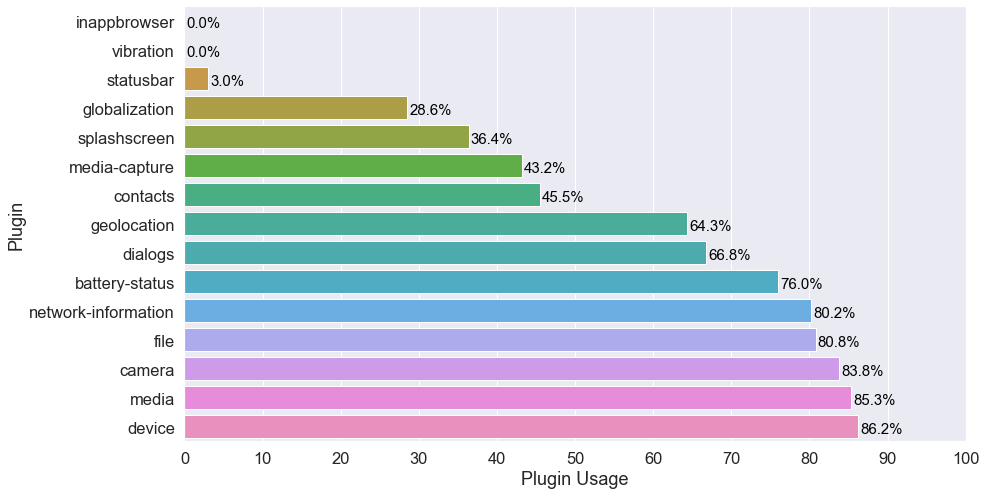

In [10]:
plt.figure(figsize=(14, 8))
sns.set(font_scale=1.5) # font size 2
sns_pct = sns.barplot(x=df_pct.values, y=df_pct.index)
# sns_pct.set_xticklabels(sns_pct.get_xticklabels(), rotation=45, horizontalalignment='right')
sns_pct.set_xticks(range(0, 101, 10))
plt.xlabel("Plugin Usage")
plt.ylabel("Plugin")
for p in sns_pct.patches:
#     print(p)
    sns_pct.annotate(
        "{:.1%}".format(p.get_width()/100), 
        (p.get_width(), p.get_y() + p.get_height()),
        fontsize=15, 
        color='black', 
        xytext=(2, 5),
        textcoords='offset points')

plt.show()

### Plugins declaration

In [11]:
df_plugin_declaration_only = df_plugin_declaration.drop(columns=["apk_name"])
df_plugin_dc = df_plugin_declaration_only
total_apk = df_plugin_dc.shape[0]
print(f"Total APKs: {total_apk}")
df_plugin_dc_cnt = df_plugin_dc.astype(bool).sum(axis=0).sort_values(ascending=True)
df_plugin_dc_cnt

Total APKs: 662


statusbar                0
vibration                1
inappbrowser           213
globalization          250
splashscreen           402
battery-status         413
network-information    425
contacts               491
camera                 496
media-capture          500
geolocation            504
media                  505
file                   512
dialogs                524
device                 541
dtype: int64

In [12]:
# percentage of apks using each plugin
df_plugin_dc_pct = df_plugin_dc_cnt.apply(lambda x: round(x/total_apk*100, 2))
df_plugin_dc_pct

statusbar               0.00
vibration               0.15
inappbrowser           32.18
globalization          37.76
splashscreen           60.73
battery-status         62.39
network-information    64.20
contacts               74.17
camera                 74.92
media-capture          75.53
geolocation            76.13
media                  76.28
file                   77.34
dialogs                79.15
device                 81.72
dtype: float64

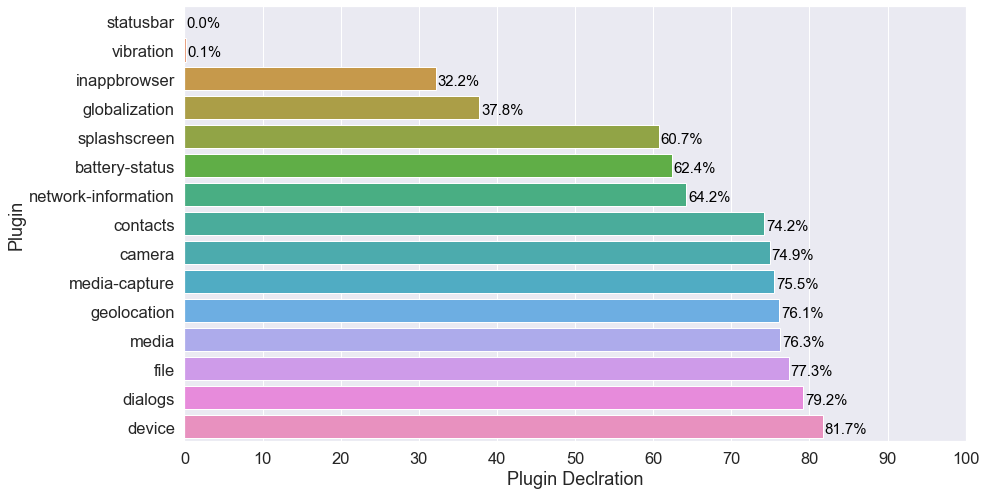

In [13]:
plt.figure(figsize=(14, 8))
sns.set(font_scale=1.5) # font size 2
sns_pct = sns.barplot(x=df_plugin_dc_pct.values, y=df_plugin_dc_pct.index)
# sns_pct.set_xticklabels(sns_pct.get_xticklabels(), rotation=45, horizontalalignment='right')
sns_pct.set_xticks(range(0, 101, 10))
plt.xlabel("Plugin Declration")
plt.ylabel("Plugin")
for p in sns_pct.patches:
#     print(p)
    sns_pct.annotate(
        "{:.1%}".format(p.get_width()/100), 
        (p.get_width(), p.get_y() + p.get_height()),
        fontsize=15, 
        color='black', 
        xytext=(2, 5),
        textcoords='offset points')

plt.show()

### Plugin Uages VS. Plugin Dclaration

In [14]:
df_usage_cnt = df_plugins_only.astype(bool).sum(axis=0)
df_usage_cnt = df_usage_cnt.apply(lambda x: round(x/total_apk*100, 2))
df_declaration_cnt = df_plugin_dc.astype(bool).sum(axis=0)
df_declaration_cnt = df_declaration_cnt.apply(lambda x: round(x/total_apk*100, 2))
d_plugin = {"plugin": list(df_usage_cnt.axes)}
d_usage = {"usage": list(df_usage_cnt.values)}
d_declaration = {"usage": list(df_declaration_cnt.values)}
d_plugin_vs = {
    "plugin": list(df_plugins_only.columns),
    "usage": list(df_usage_cnt.values),
    "declaration": list(df_declaration_cnt.values)
}
# print(d_plugin_vs)
df_plugin_vs = pd.DataFrame(data=d_plugin_vs)
df_plugin_vs

,plugin,usage,declaration
0,battery-status,75.98,62.39
1,camera,83.84,74.92
2,contacts,45.47,74.17
3,device,86.25,81.72
4,dialogs,66.77,79.15
5,file,80.82,77.34
6,geolocation,64.35,76.13
7,globalization,28.55,37.76
8,inappbrowser,0.00,32.18
9,media,85.35,76.28


In [15]:
# order by value in declaration
df_plugin_vs_order = df_plugin_vs.sort_values(by=['declaration'])
df_plugin_vs_order

,plugin,usage,declaration
13,statusbar,3.02,0.00
14,vibration,0.00,0.15
8,inappbrowser,0.00,32.18
7,globalization,28.55,37.76
12,splashscreen,36.40,60.73
0,battery-status,75.98,62.39
11,network-information,80.21,64.20
2,contacts,45.47,74.17
1,camera,83.84,74.92
10,media-capture,43.20,75.53


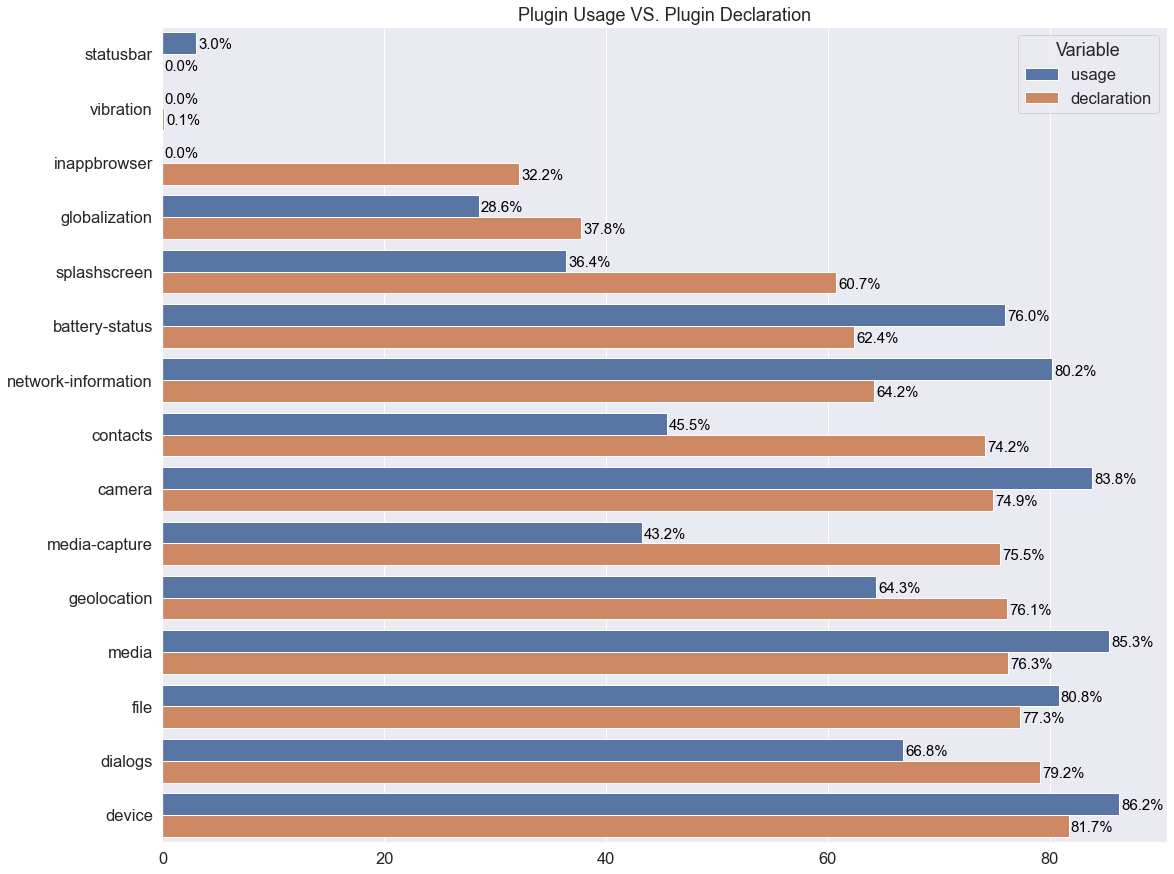

In [16]:
# ax = sns.barplot(x="Percentage", y="Plugin", hue="plugin", data=df_plugin_vs_order)
fig, ax1 = plt.subplots(figsize=(18, 15))
tidy = df_plugin_vs_order.melt(id_vars='plugin').rename(columns=str.title)
# print(tidy)
sns_pct = sns.barplot(x='Value', y='Plugin', hue='Variable', data=tidy, ax=ax1)
# sns.despine(fig)
for p in sns_pct.patches:
#     print(p)
    sns_pct.annotate(
        "{:.1%}".format(p.get_width()/100), 
        (p.get_width(), p.get_y() + p.get_height()),
        fontsize=15, 
        color='black', 
        xytext=(2, 5),
        textcoords='offset points')
plt.xlabel("")
plt.ylabel("")
plt.title('Plugin Usage VS. Plugin Declaration')
plt.show()

## Heatmap

### Heatmap for Entire database

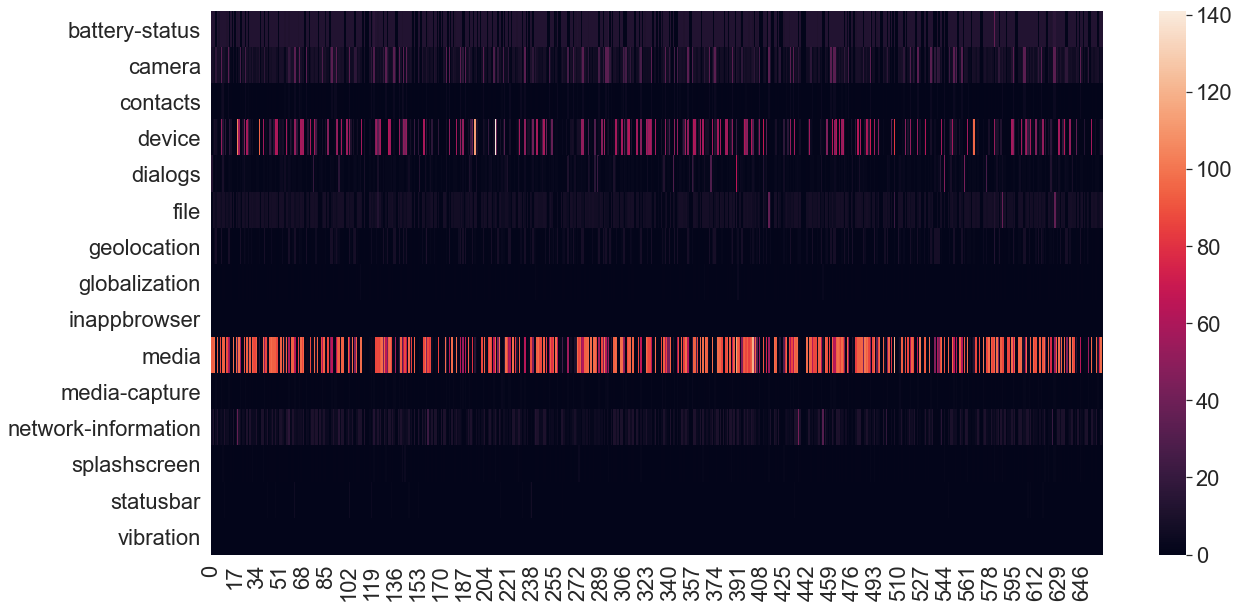

In [17]:
df_plugins_only_T = df_plugins_only.T    # transpose
plt.figure(figsize=(20,10))
sns.set(font_scale=2) # font size 2
ax = sns.heatmap(df_plugins_only_T)

### Heatmap for a small set of dataset

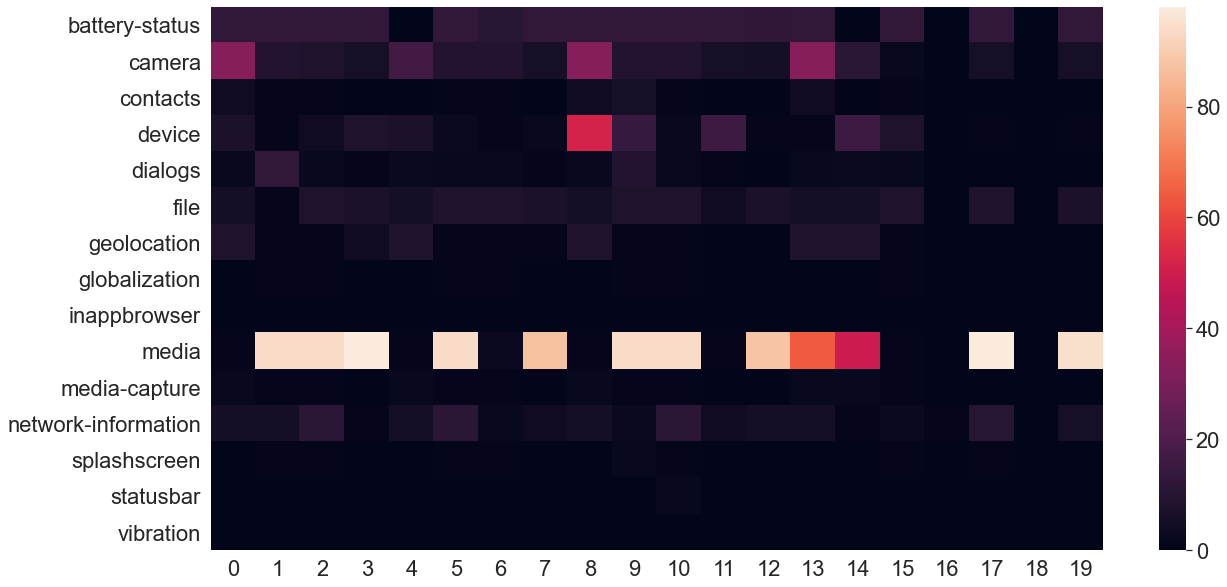

In [18]:
# select a set of apks, originial
set_num = 20
plt.figure(figsize=(20,10))
sns.set(font_scale=2) # font size 2
ax = sns.heatmap(df_plugins_only_T.iloc[:, :set_num])


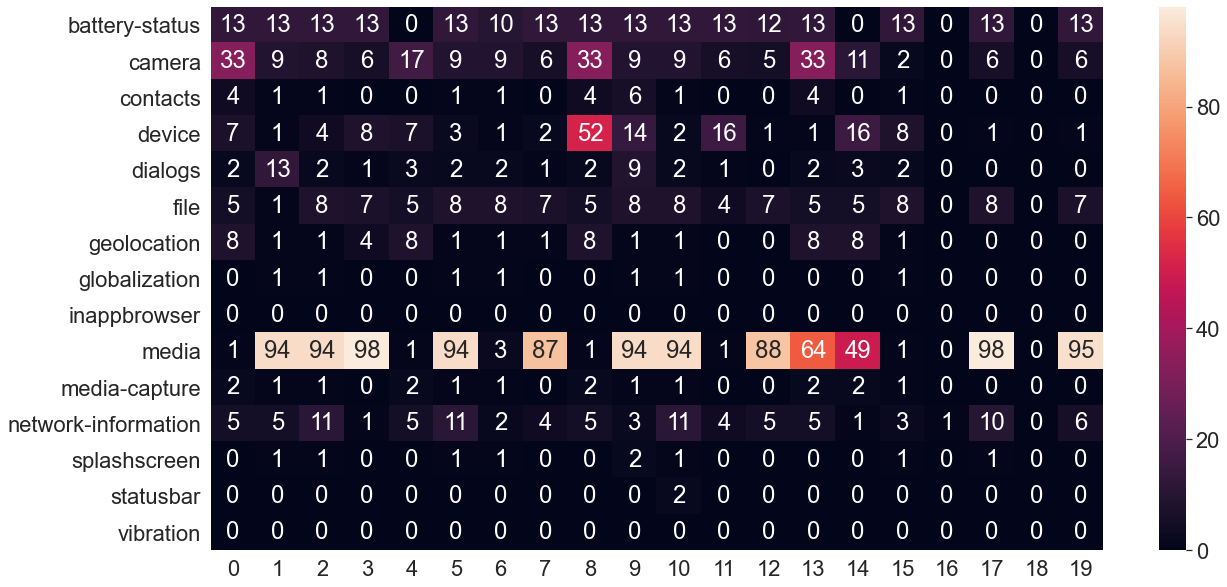

In [19]:
# select a set of apks, heatmap with annotation
plt.figure(figsize=(20,10))
sns.set(font_scale=2) # font size 2
ax = sns.heatmap(df_plugins_only_T.iloc[:, :set_num], annot=True)

### Heatmap without media and device

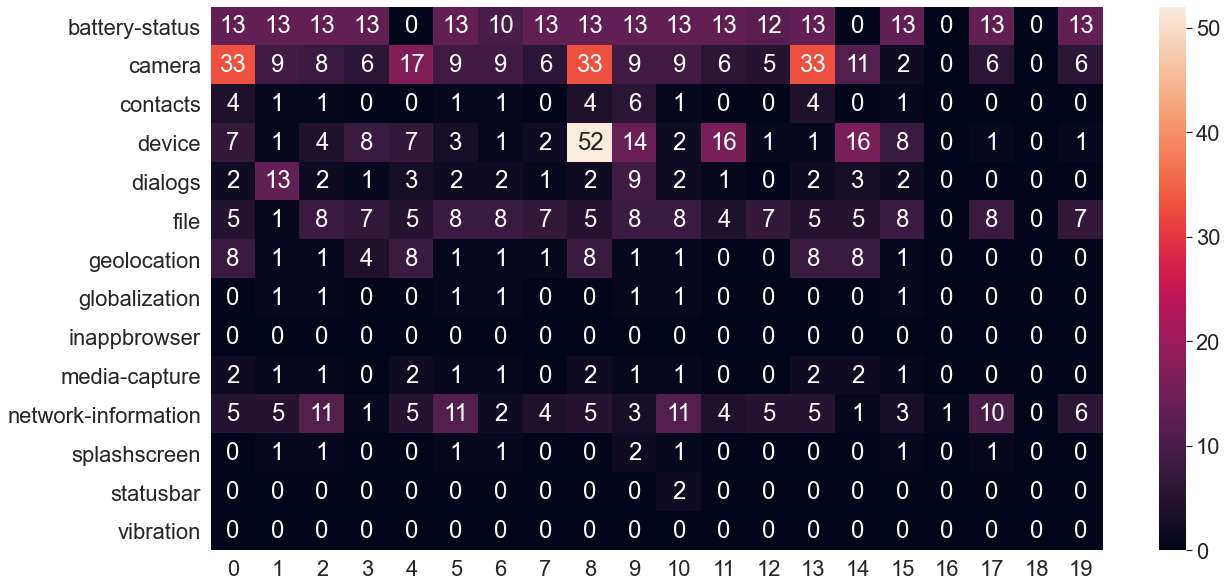

In [20]:

df_plugins_media = df_api.drop(columns=["apk_name", "media"])
df_plugins_media_T = df_plugins_media.T
# select a set of apks, heatmap with annotation
plt.figure(figsize=(20,10))
sns.set(font_scale=2) # font size 2
ax = sns.heatmap(df_plugins_media_T.iloc[:, :set_num], annot=True)